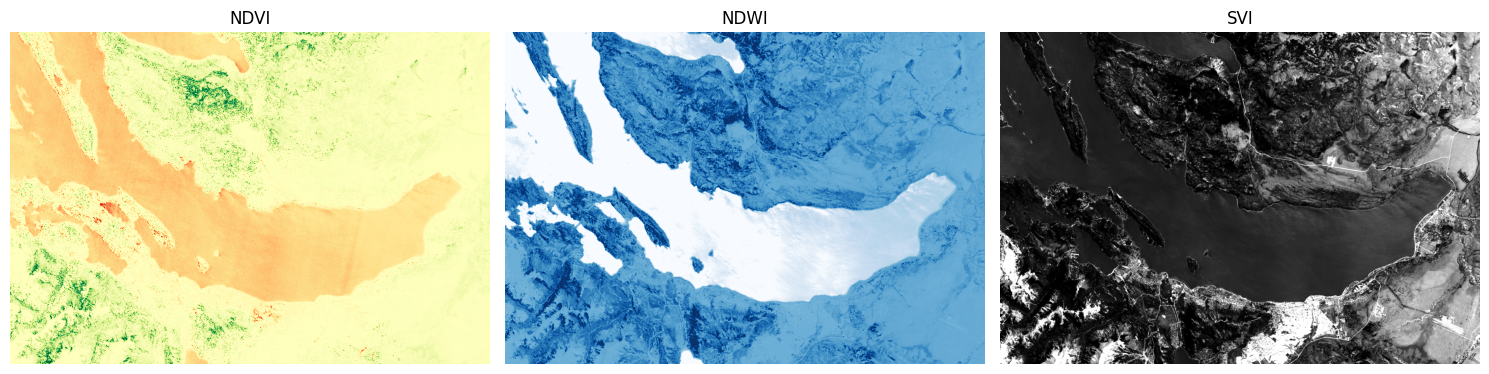

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Funciones para calcular los índices
def calculate_ndvi(nir_band, red_band):
    ndvi = (nir_band - red_band) / (nir_band + red_band + 1e-10)
    return ndvi

def calculate_ndwi(nir_band, green_band):
    ndwi = (green_band - nir_band) / (green_band + nir_band + 1e-10)
    return ndwi

def calculate_svi(red_band):
    svi = red_band
    return svi

# Cargar las bandas necesarias
red_band = cv2.imread('bariloche2/B1.tif', cv2.IMREAD_GRAYSCALE)
nir_band = cv2.imread('bariloche2/B2.tif', cv2.IMREAD_GRAYSCALE)
green_band = cv2.imread('bariloche2/B3.tif', cv2.IMREAD_GRAYSCALE)

# Asegurarse de que las bandas tengan el mismo tamaño
if red_band.shape != nir_band.shape or red_band.shape != green_band.shape:
    raise ValueError("Las bandas deben tener el mismo tamaño.")

# Calcular los índices
ndvi = calculate_ndvi(nir_band.astype(float), red_band.astype(float))
ndwi = calculate_ndwi(nir_band.astype(float), green_band.astype(float))
svi = calculate_svi(red_band.astype(float))

# Mostrar los índices como imágenes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(ndvi, cmap='RdYlGn')
axes[0].set_title('NDVI')
axes[0].axis('off')

axes[1].imshow(ndwi, cmap='Blues')
axes[1].set_title('NDWI')
axes[1].axis('off')

axes[2].imshow(svi, cmap='gray')
axes[2].set_title('SVI')
axes[2].axis('off')

plt.tight_layout()
plt.show()
